In [24]:
# Import Library

In [97]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [26]:
# Import DataSet

In [27]:
salary_data_test=pd.read_csv('SalaryData_Test.csv')

In [28]:
salary_data_train=pd.read_csv('SalaryData_Train.csv')
salary_data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
# Data Understanding

In [53]:
salary_data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [30]:
salary_data_train.shape

(30161, 14)

In [31]:
salary_data_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [33]:
salary_data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# Data Visualization

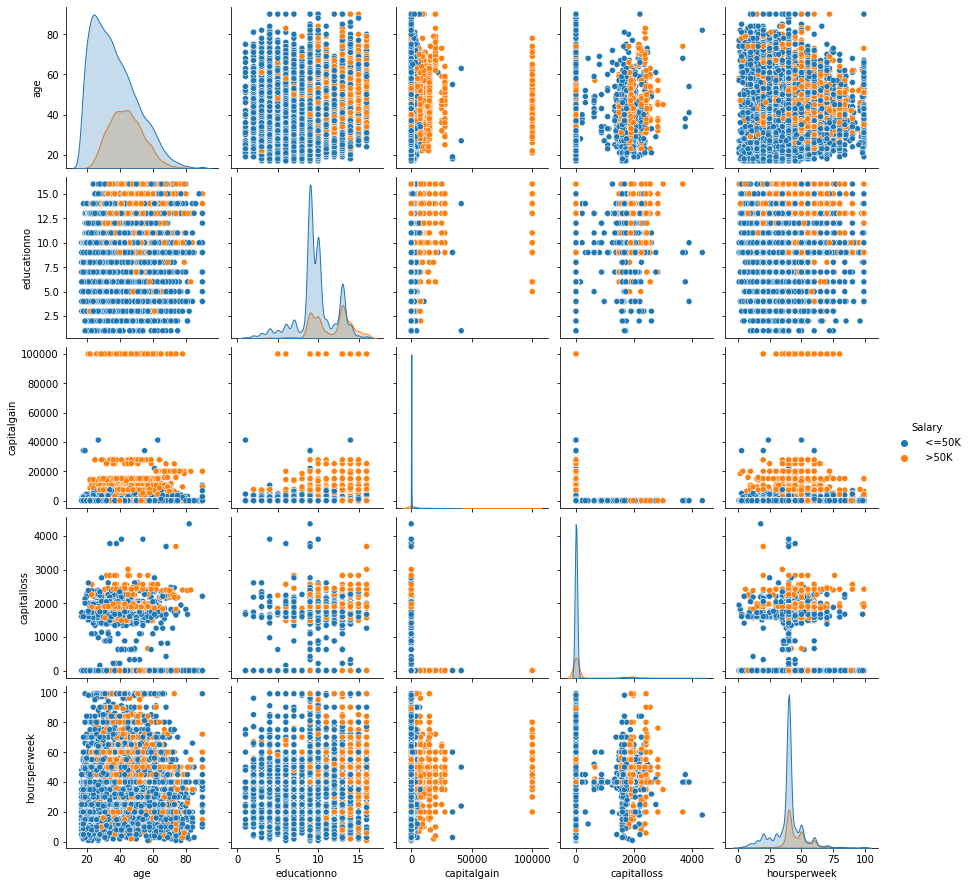

In [34]:
sns.pairplot(salary_data_train,diag_kind='kde',hue='Salary')

In [35]:
# Data Preprocessing

In [55]:
print(salary_data_train.columns)
print(salary_data_test.columns)

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')
Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


In [42]:
le=LabelEncoder()

In [85]:
# For train data 
salary_data_train['workclass']=le.fit_transform(salary_data_train.workclass)
salary_data_train['education']=le.fit_transform(salary_data_train.education)
salary_data_train['maritalstatus']=le.fit_transform(salary_data_train.maritalstatus)
salary_data_train['occupation']=le.fit_transform(salary_data_train.occupation)
salary_data_train['relationship']=le.fit_transform(salary_data_train.relationship)
salary_data_train['race']=le.fit_transform(salary_data_train.race)
salary_data_train['sex']=le.fit_transform(salary_data_train.sex)
salary_data_train['native']=le.fit_transform(salary_data_train.native)
# For Test Data
salary_data_test['workclass']=le.fit_transform(salary_data_test.workclass)
salary_data_test['education']=le.fit_transform(salary_data_test.education)
salary_data_test['maritalstatus']=le.fit_transform(salary_data_test.maritalstatus)
salary_data_test['occupation']=le.fit_transform(salary_data_test.occupation)
salary_data_test['relationship']=le.fit_transform(salary_data_test.relationship)
salary_data_test['race']=le.fit_transform(salary_data_test.race)
salary_data_test['sex']=le.fit_transform(salary_data_test.sex)
salary_data_train['native']=le.fit_transform(salary_data_train.native)

In [86]:
# Model Building

In [87]:
x=salary_data_train.drop(['Salary'],axis=1)
y=salary_data_train.Salary

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [89]:
salary_data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [90]:
# Model Training

In [91]:
# For Gausian Model
g_model=GaussianNB()

In [92]:
g_model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
y_train_pred=g_model.predict(x_train)

In [96]:
y_pred=g_model.predict(x_test)

In [98]:
print('Accuracy Score :',accuracy_score(y_train,y_train_pred))
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Accuracy Score : 0.7962118700265252
Accuracy Score : 0.7966185977125808


In [99]:
# For MultinomialNB

In [108]:
mn_model=MultinomialNB()

In [109]:
mn_model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [120]:
# Model Testing

In [121]:
y_train_pred=mn_model.predict(x_train)

In [122]:
y_pred=mn_model.predict(x_test)

In [123]:
print('Accuracy Score :',accuracy_score(y_train,y_train_pred))
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Accuracy Score : 0.7719661803713528
Accuracy Score : 0.7767279960218797
